# Notebook #3: Gestión de Outliers

In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_nulos as sn
from src import soporte_preprocesamiento as sp

- Importamos el dataframe generado en el notebook anterior y lo comprobamos.

In [3]:
df = pd.read_csv("../../datos/modelo1/csv_encoded.csv", index_col=0)
df.sample(2)

,price,size,distance,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,rooms_0,...,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3,exterior_False,exterior_True,municipality,floor,hasLift
56,700.0,45.0,12321,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,706.857143,698.088889,694.703226
78,725.0,69.0,35892,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,707.432748,708.426471,703.847953


## Outliers multivariados

- Los outliers multivariados se identifican considerando las relaciones y dependencias entre dos o más variables, en este caso, tenemos size y distance, con lo cual, tendremos que usar Isolation Forest o Local Outlier Factor.

- Sabemos que el formato CSV no guarda tipos de datos, con lo cual, debemos transformar las columnas con encoding a string, debido a que la gestión de outliers es, naturalmente, sobre numéricas.

In [4]:
df[['propertyType_chalet',
       'propertyType_countryHouse', 'propertyType_duplex', 'propertyType_flat',
       'propertyType_penthouse', 'propertyType_studio', 'rooms_0', 'rooms_1',
       'rooms_2', 'rooms_3', 'rooms_4', 'bathrooms_1', 'bathrooms_2',
       'bathrooms_3', 'exterior_False', 'exterior_True', 'municipality',
       'floor', 'hasLift']] = df[['propertyType_chalet',
       'propertyType_countryHouse', 'propertyType_duplex', 'propertyType_flat',
       'propertyType_penthouse', 'propertyType_studio', 'rooms_0', 'rooms_1',
       'rooms_2', 'rooms_3', 'rooms_4', 'bathrooms_1', 'bathrooms_2',
       'bathrooms_3', 'exterior_False', 'exterior_True', 'municipality',
       'floor', 'hasLift']].astype(str)

- Recordemos nuestros outliers con la ayuda del boxplot:

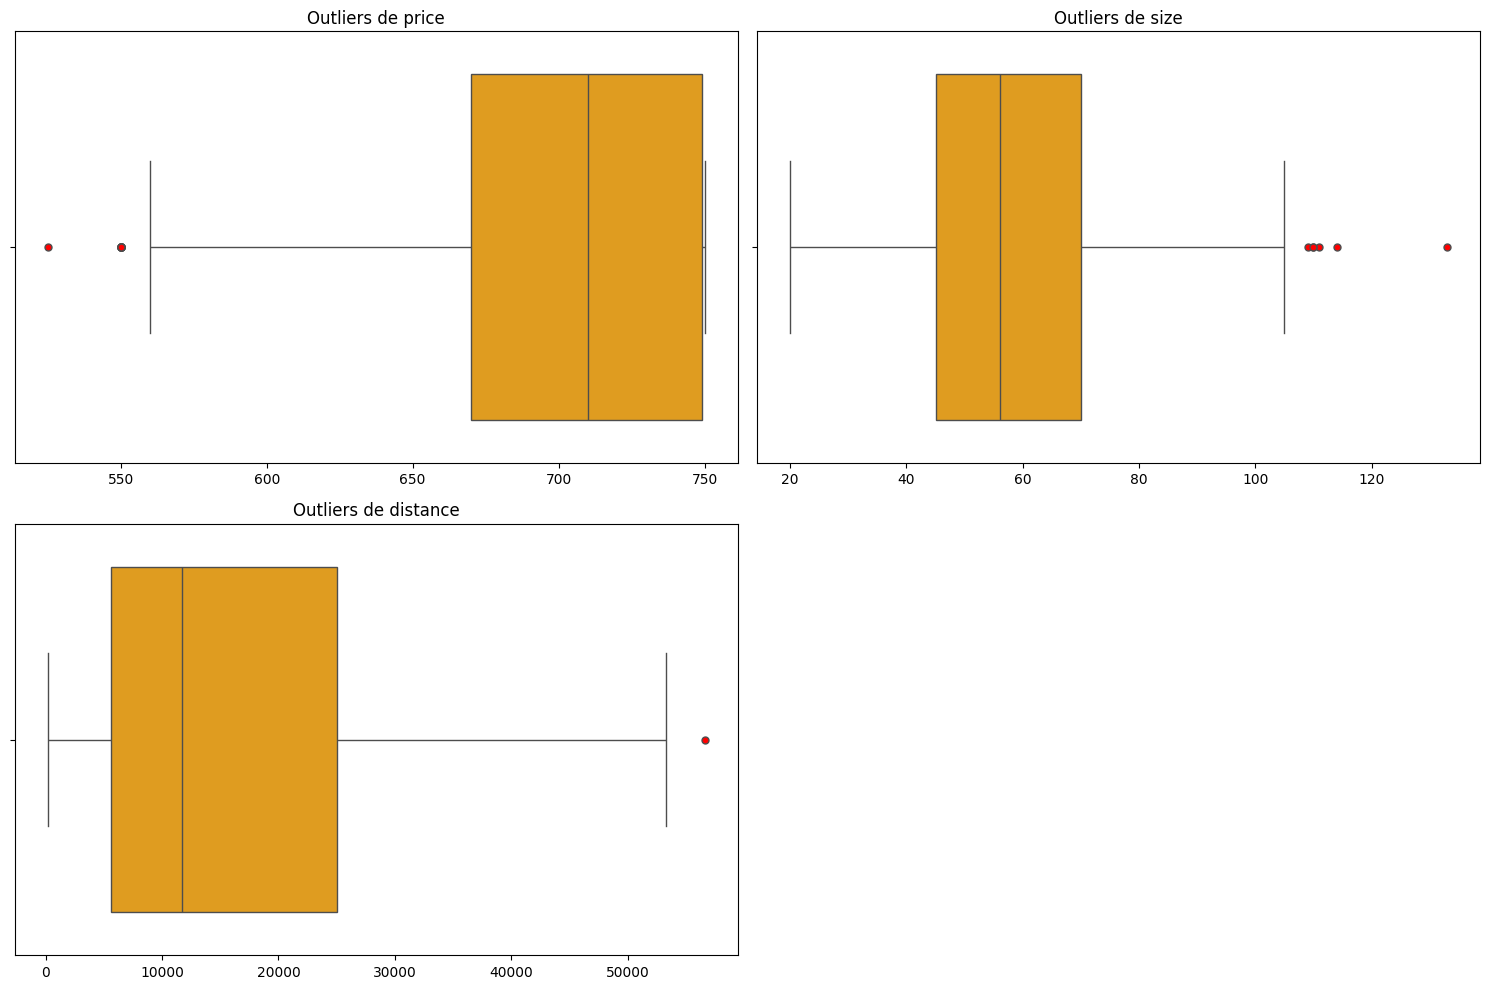

In [5]:
sp.detectar_outliers(df)

- Tras el filtro aplicado en el EDA (Notebook #1), podemos ver que son escasos y claramente diferentes. La elección entre Local Outlier Factor (LOF) y Isolation Forest (IF) depende del contexto de los datos y el problema que deseamos resolver.

- En este caso, para gestionar los nulos, usaremos el Isolation Forest, debido a que tenemos datos atípicos raros y claramente diferentes al resto de los datos.

In [6]:
col_numericas = df.select_dtypes(include=np.number).columns
col_numericas

contaminacion = [0.01, 0.05]
estimadores = [25, 50, 75]

sn.outliers_isolation_forest(df, contaminacion, estimadores)

,price,size,distance,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,rooms_0,...,exterior_True,municipality,floor,hasLift,outliers_ifo_0.01_25,outliers_ifo_0.01_50,outliers_ifo_0.01_75,outliers_ifo_0.05_25,outliers_ifo_0.05_50,outliers_ifo_0.05_75
0,750.0,60.0,7037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,706.8571428571429,698.0888888888888,703.8479532163743,1,1,1,1,1,1
1,750.0,70.0,16145,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,735.576450200277,678.3448275862069,694.7032258064517,1,1,1,1,1,1
2,590.0,70.0,56596,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,643.7258064516129,678.5689655172414,694.7032258064517,-1,-1,1,-1,-1,-1
3,684.0,45.0,10656,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,706.8571428571429,678.5689655172414,652.9333703515305,1,1,1,1,1,1
4,600.0,73.0,37062,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,648.7258064516129,698.0888888888888,694.7032258064517,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,640.0,69.0,29311,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,668.7258064516129,705.7592592592592,703.8479532163743,1,1,1,1,1,1
337,700.0,54.0,11656,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,704.9990685699748,708.4264705882352,703.8479532163743,1,1,1,1,1,1
338,700.0,59.0,7529,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,706.8571428571429,717.5910976177427,703.8479532163743,1,1,1,1,1,1
339,700.0,75.0,30359,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,705.0909090851166,708.4264705882352,694.7032258064517,1,1,1,1,1,1


In [7]:
col_numericas

Index(['price', 'size', 'distance'], dtype='object')

- Visualizaremos ahora nuestros outliers.

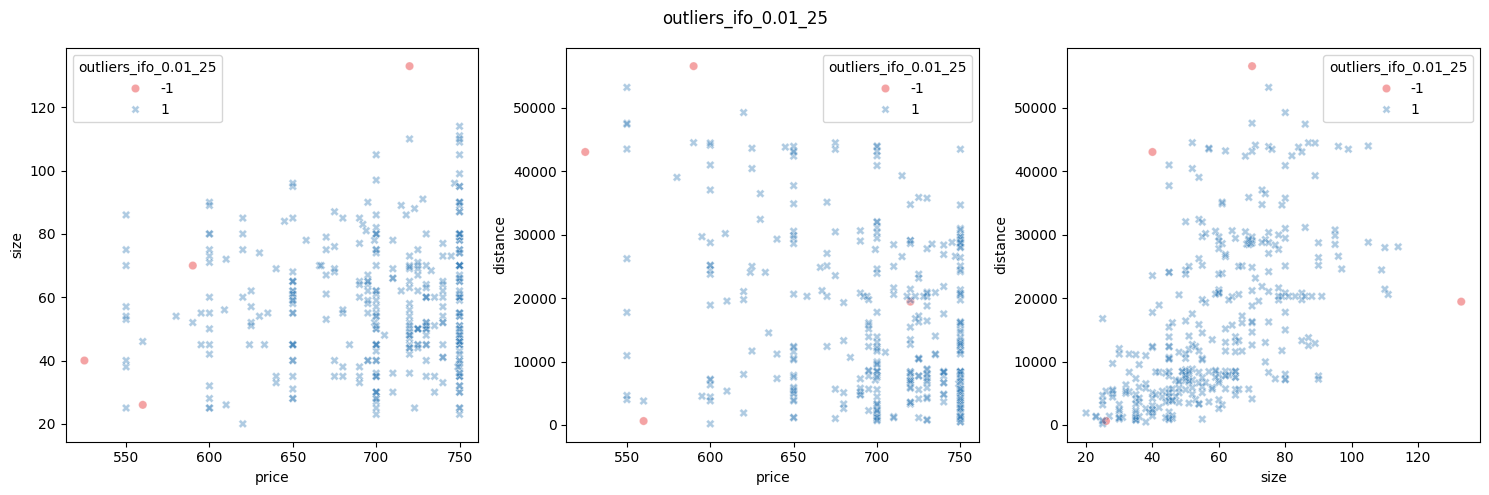

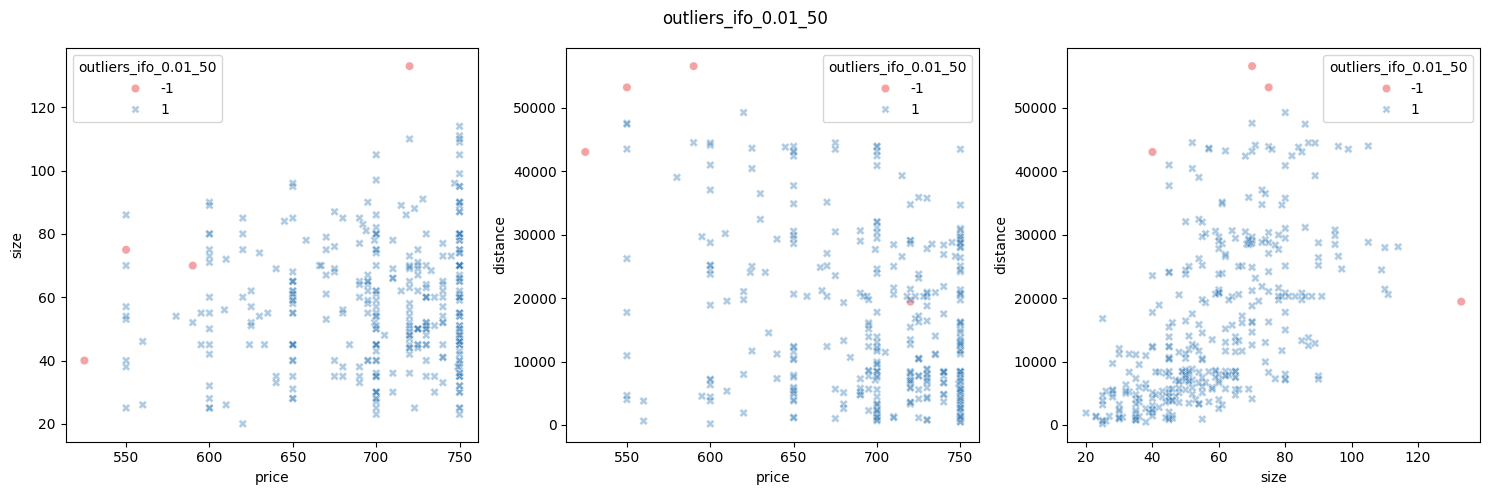

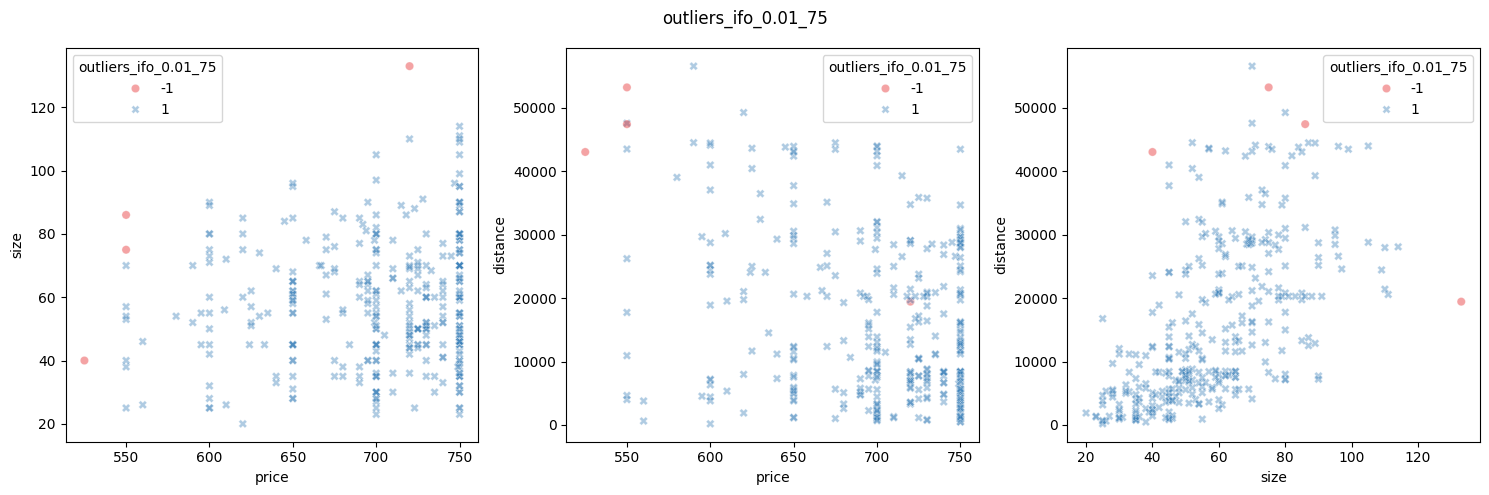

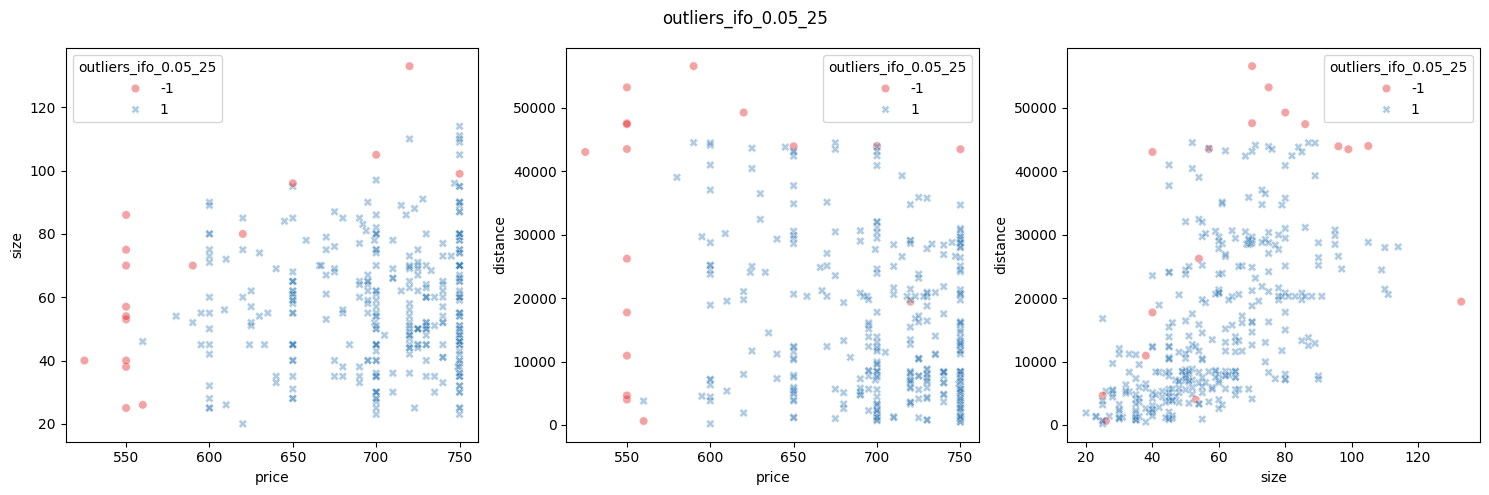

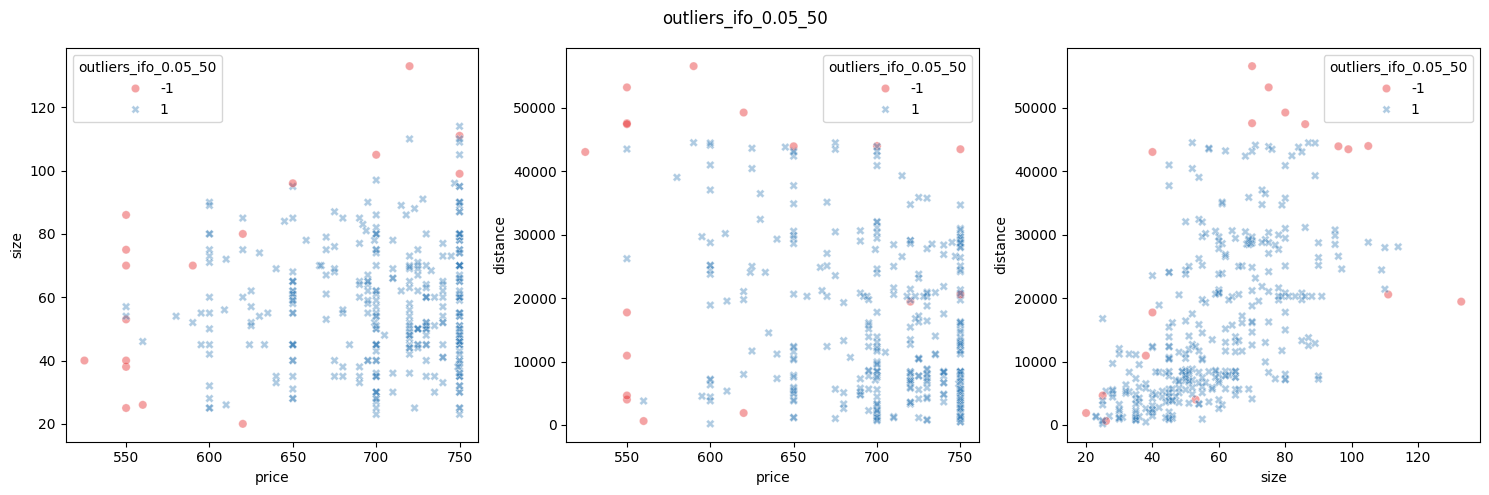

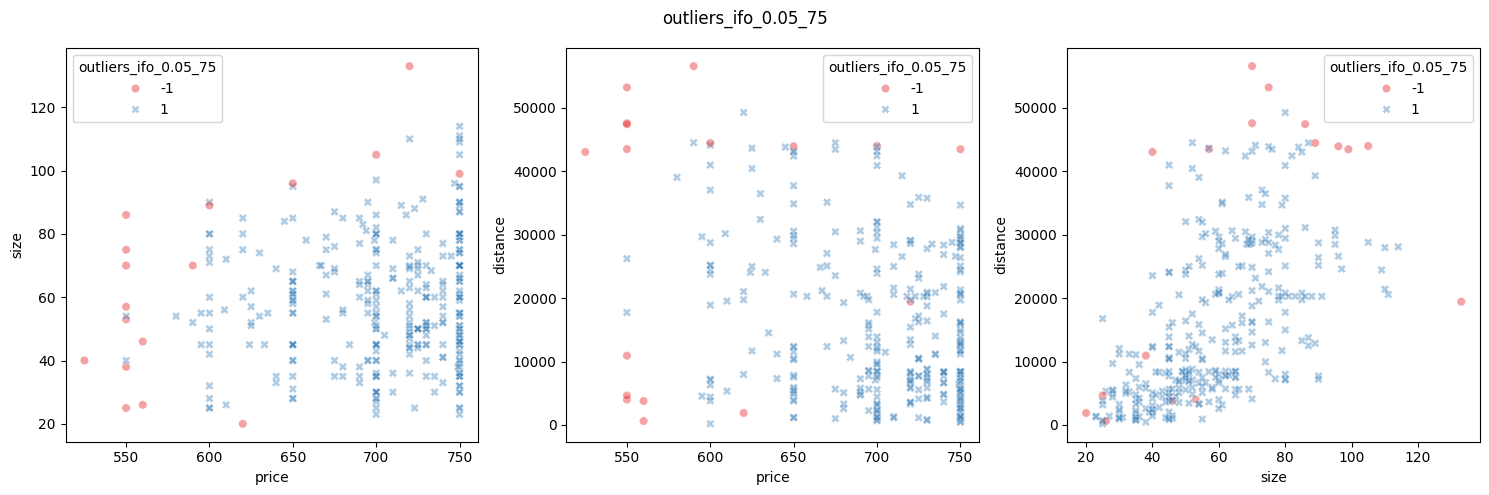

In [8]:
sn.visualizar_outliers(df, col_numericas)

Consideraremos outliers aquellas filas que contengan más de 70% de nulos, en este caso, si tenemos 6 columnas de outliers, que serían 4.

In [9]:
cantidad_col = 4
df_filtrado = df[(df == -1).sum(axis=1) > cantidad_col]
df_filtrado

,price,size,distance,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,rooms_0,...,exterior_True,municipality,floor,hasLift,outliers_ifo_0.01_25,outliers_ifo_0.01_50,outliers_ifo_0.01_75,outliers_ifo_0.05_25,outliers_ifo_0.05_50,outliers_ifo_0.05_75
2,590.0,70.0,56596,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,643.7258064516129,678.5689655172414,694.7032258064517,-1,-1,1,-1,-1,-1
52,720.0,133.0,19453,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,671.3019167120681,708.4264705882352,703.8479532163743,-1,-1,-1,-1,-1,-1
183,550.0,75.0,53247,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,623.7258064516129,678.5689655172414,694.7032258064517,1,-1,-1,-1,-1,-1
253,525.0,40.0,43059,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,643.1744943255733,698.0888888888888,703.8479532163743,-1,-1,-1,-1,-1,-1


In [10]:
df_filtrado.describe()

,price,size,distance,outliers_ifo_0.01_25,outliers_ifo_0.01_50,outliers_ifo_0.01_75,outliers_ifo_0.05_25,outliers_ifo_0.05_50,outliers_ifo_0.05_75
count,4.000000,4.000000,4.000000,4.0,4.0,4.0,4.0,4.0,4.0
mean,596.250000,79.500000,43088.750000,-0.5,-1.0,-0.5,-1.0,-1.0,-1.0
std,86.734749,38.871583,16775.829922,1.0,0.0,1.0,0.0,0.0,0.0
min,525.000000,40.000000,19453.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
25%,543.750000,62.500000,37157.500000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,570.000000,72.500000,48153.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
75%,622.500000,89.500000,54084.250000,-0.5,-1.0,-0.5,-1.0,-1.0,-1.0
max,720.000000,133.000000,56596.000000,1.0,-1.0,1.0,-1.0,-1.0,-1.0


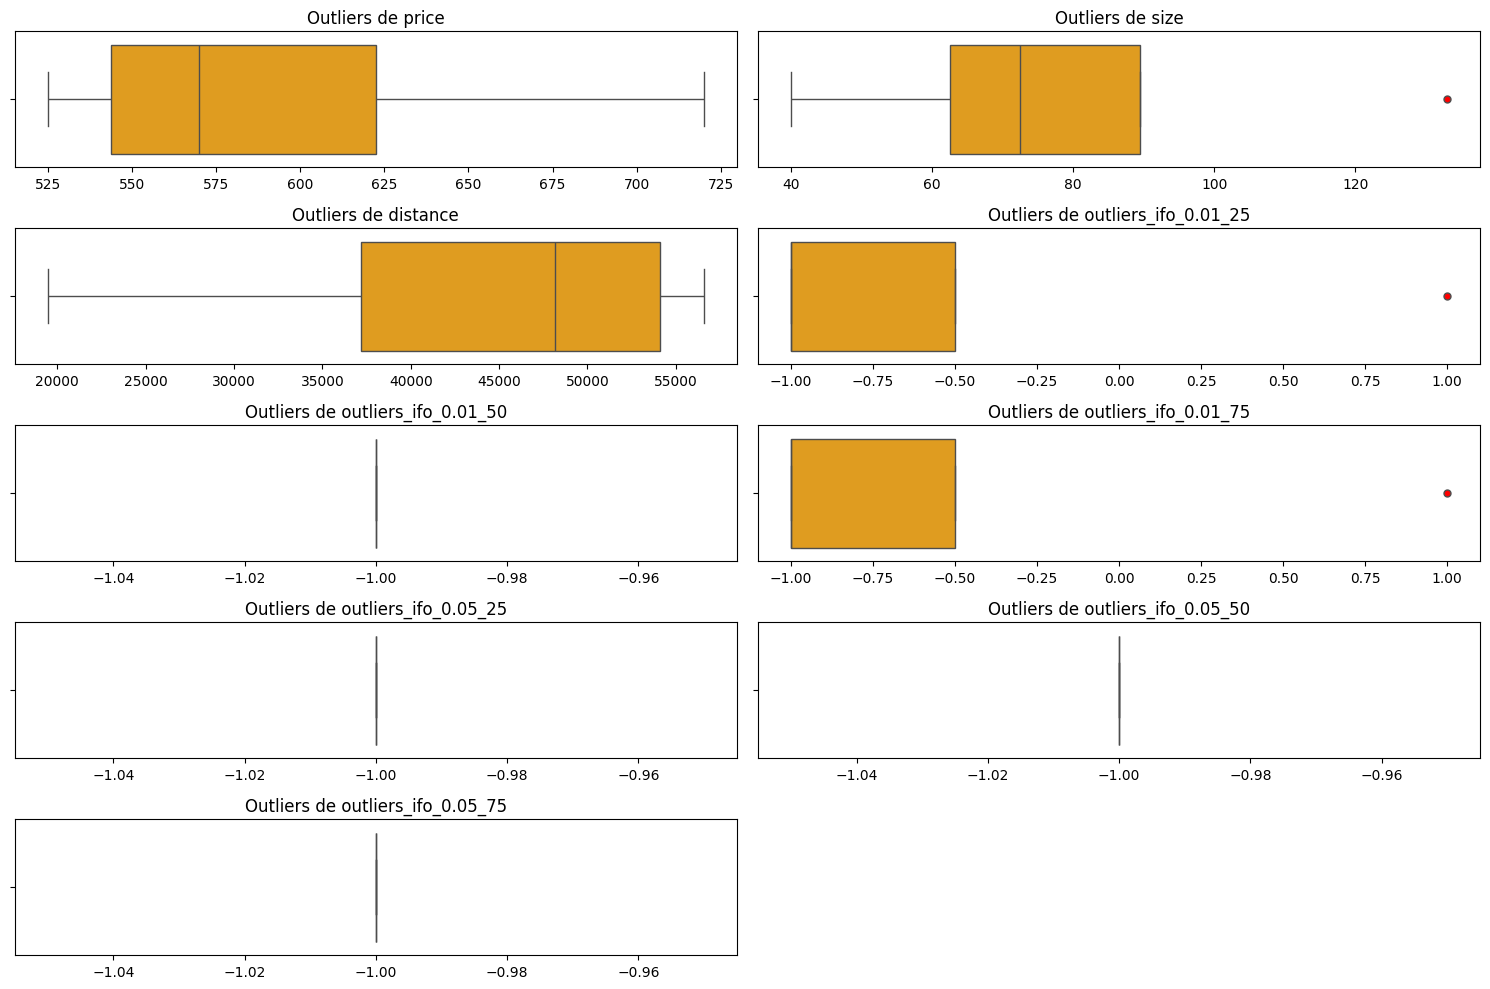

In [11]:
sp.detectar_outliers(df_filtrado)

- En este caso, tenemos únicamente 4 outliers. Para las columna de size la media la mediana similares, mientras que, para la columna distance sí se alejan, por lo que, procederemos a reemplazar los valores extremos por la mediana en ambos casos, así, reducimos el impacto de eliminar datos, y evitamos la sensibilidad de la media a los valores extremos, existiendo aquí en el caso de distance.

In [12]:
df.describe()

,price,size,distance,outliers_ifo_0.01_25,outliers_ifo_0.01_50,outliers_ifo_0.01_75,outliers_ifo_0.05_25,outliers_ifo_0.05_50,outliers_ifo_0.05_75
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,697.451613,58.190616,15981.730205,0.976540,0.976540,0.976540,0.900293,0.900293,0.900293
std,53.584415,19.520979,12875.872936,0.215654,0.215654,0.215654,0.435924,0.435924,0.435924
min,525.000000,20.000000,183.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,670.000000,45.000000,5580.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,710.000000,56.000000,11728.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,749.000000,70.000000,25013.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,750.000000,133.000000,56596.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.loc[df_filtrado.index, "size"] = float(df["size"].median())

In [14]:
df.loc[df_filtrado.index, "distance"] = float(df["distance"].median())

- A pesar de haber hecho una criba inicial en los tamaños de las casas y los precios, vemos todavía ruido en las gráficas por encima de 100m2, así que, acotaremos aún más el modelo y nos quedaremos con aquellas por debajo de ese valor. Son, en este caso, 7 viviendas.

In [15]:
df[df["size"] > 100]

,price,size,distance,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,rooms_0,...,exterior_True,municipality,floor,hasLift,outliers_ifo_0.01_25,outliers_ifo_0.01_50,outliers_ifo_0.01_75,outliers_ifo_0.05_25,outliers_ifo_0.05_50,outliers_ifo_0.05_75
17,700.0,105.0,44003,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,643.1744943255733,678.3448275862069,694.7032258064517,1,1,1,-1,-1,-1
171,750.0,111.0,20583,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,705.499981808035,717.5910976177427,703.8479532163743,1,1,1,1,-1,1
218,720.0,110.0,21417,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,705.499981808035,678.5689655172414,703.8479532163743,1,1,1,1,1,1
239,750.0,109.0,24455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,661.0901311021613,698.0888888888888,703.8479532163743,1,1,1,1,1,1
246,750.0,105.0,28810,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,735.8675620834928,708.4264705882352,694.7032258064517,1,1,1,1,1,1
308,750.0,114.0,28099,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,723.7258064516129,708.4264705882352,694.7032258064517,1,1,1,1,1,1
313,750.0,110.0,27976,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,726.2721337476287,708.4264705882352,694.7032258064517,1,1,1,1,1,1


- Aplicamos el filtro:

In [16]:
df = df[df["size"] < 100]

- Eliminamos todas las columnas de outliers generadas por el Isolation Forest.

In [17]:
df.drop(columns=['outliers_ifo_0.01_25', 'outliers_ifo_0.01_50',
       'outliers_ifo_0.01_75', 'outliers_ifo_0.05_25', 'outliers_ifo_0.05_50',
       'outliers_ifo_0.05_75'], inplace=True)

In [18]:
df.head()

,price,size,distance,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,rooms_0,...,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3,exterior_False,exterior_True,municipality,floor,hasLift
0,750.0,60.0,7037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,706.8571428571429,698.0888888888888,703.8479532163743
1,750.0,70.0,16145,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,735.576450200277,678.3448275862069,694.7032258064517
2,590.0,56.0,11728,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,643.7258064516129,678.5689655172414,694.7032258064517
3,684.0,45.0,10656,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,706.8571428571429,678.5689655172414,652.9333703515305
4,600.0,73.0,37062,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,648.7258064516129,698.0888888888888,694.7032258064517


- Guardamos el DF que pasará al paso #4 del preprocesamiento, donde realizaremos la Estandarización de las variables numéricas.

In [20]:
df.to_csv("../../datos/modelo1/csv_sin_outliers.csv")